# API's

Several organizations offer API's that let you fetch interesting data for research (of fun). 
Check out this website for an overview of thousands of cool APIs that you might want to use someday: https://www.programmableweb.com/. For example, the city of Amsterdam offers a very elaborate API with information on diverse topics, ranging from environmental themes to insights into business investment zones. 

Yet, not all APIs are alike. APIs vary considerably regarding the amount of fetchable information. For example, the Twitter API is rather restricted in terms of the amount of tweets you can access for free. 

Other organizations, however, let you access all their data. Several European governmental organizations are making efforts to committed to increasing the public accessibility of their data - amongst others via APIs. Thats good news for us!

One of such organizations is the __Rijksmuseum__ in Amsterdam. 

## Rijksmuseum API

The Rijksmuseum offers a cool API that allows you to fetch information about artists, and even high-quality images.

Especially the information about expositions might be relevant for researchers interested in (cultural) agenda setting effects between cultural institutions, media coverage, and/ or over-time variation in the number of visitors (see for inspiration: https://journals.sagepub.com/doi/abs/10.1177/0093650210395747).

The documentation on how to use the Rijksmuseum's API is quite extensive, and can be found on their github page: http://rijksmuseum.github.io/

In order to get acces to this API, you have to make an account in Rijksstudio, on the website of the Rijksmuseum. This is free and easy to do. Once you have created your account, visit your profile and go to 'settings'. At the bottom of the page you will find the possibility to request your API key. So you, and you will recieve the key in your email. 


In [1]:
import requests
from pprint import pprint
import json
import sys

print(sys.version)

3.4.3 (v3.4.3:9b73f1c3e601, Feb 23 2015, 02:52:03) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [2]:
base_url = 'https://www.rijksmuseum.nl/api/pages/en/{}?key={}&format=json'
page_of_interest = 'whats-on/exhibitions-past'
#key = 'YOUR_KEY'
key = 'e16kvzIX'
full_url = base_url.format(page_of_interest, key)

full_url

'https://www.rijksmuseum.nl/api/pages/en/whats-on/exhibitions-past?key=e16kvzIX&format=json'

With the .get() method you can fetch the data from the API. If the HTTP status code '200' is returned, you know everything went well. 

In [3]:
r = requests.get(full_url)
print('Response HTTP Status Code: {status_code}'.format(status_code=r.status_code))

Response HTTP Status Code: 200


Next, we load the data in json format, so we can work with it. Next, we will get some general information about the past exhibitions. Lets for example print the titles and dates of 10 recent exhibitions

In [4]:
data = json.loads(r.content.decode('utf-8')) # this loads the data

In [5]:
for item in data['contentPage']['overviewItems'][:10]:
    print("Title:  {}".format(item['page']['title']))
    print("Date:   {}".format((item['text'])))
    print("URL:    {}".format(item['page']['url'])) 

Title:  Colourful ceramics
Date:   1 August – 15 October 2018
URL:    https://www.rijksmuseum.nl/en/colourful-ceramics
Title:  Chillida in the Rijksmuseum Gardens
Date:   22 June – 23 September 2018
URL:    https://www.rijksmuseum.nl/en/chillida
Title:  Lace
Date:   24 June 2017 to 22 July 2018
URL:    https://www.rijksmuseum.nl/en/lace
Title:  Ed van der Elsken Through the Eyes of Jan de Bont
Date:   8 March - 3 June 2018
URL:    https://www.rijksmuseum.nl/en/press/press-releases/ed-van-der-elsken-through-the-eyes-of-jan-de-bont
Title:  A journey to 18th century Canton
Date:   8 November 2017 – 27 May 2018
URL:    https://www.rijksmuseum.nl/en/a-journey-to-18th-century-canton
Title:  Fun on the ice at the Rijksmuseum
Date:   1 December 2017 – 17 April 2018
URL:    https://www.rijksmuseum.nl/en/fun-on-the-ice
Title:  Statelessness, Anoek Steketee, Document Nederland
Date:   6 October 2017 – 7 January 2018
URL:    https://www.rijksmuseum.nl/en/document-nederland-2017
Title:  Top Ten on 

Now lets get some information on the number of exhibitions per year. 

In [8]:
from collections import defaultdict
from datetime import datetime

counts = defaultdict(int)

for item in data['contentPage']['overviewItems']:
    end_date = ' '.join(item['text'].split(' ')[-3:])
    dt = datetime.strptime(end_date, '%d %B %Y')
    counts[dt.year] += 1

counts

defaultdict(int,
            {2012: 3, 2013: 1, 2014: 8, 2015: 14, 2016: 15, 2017: 17, 2018: 8})

### Saving the data

In [347]:
import csv

exhibitions=[]
dates=[]
url=[]

for x in data['contentPage']['overviewItems']:
    exhibitions.append(x['page']['title'])
    end_date = ' '.join(item['text'].split(' ')[-3:])
    dates.append(datetime.strptime(end_date, '%d %B %Y'))
    url.append(x['page']['url'])

output=zip(exhibitions,dates,url)
with open("exhibitionswithdate.csv",mode="w",encoding="utf-8") as fo:
    writer=csv.writer(fo)
    writer.writerows(output)

# World bank API: climate data

Yet another example of a cool API is the one offered by the World Bank. Their API allows you to get climate chagne data for many countries. Check it out here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

In a few lines of code you can create a graph vizualizing the past or predicted temperature change in a country of interest. Consider for example the expected change in temperature in the Netherlands between 2020 and 2039:


In [381]:
full_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/NLD.json'

r = requests.get(full_url)
print('Response HTTP Status Code: {status_code}'.format(status_code=r.status_code))

Response HTTP Status Code: 200


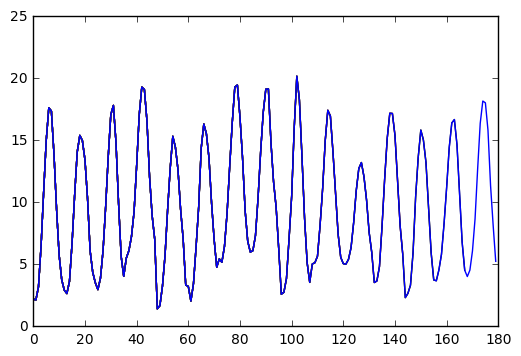

In [410]:
import matplotlib.pyplot as plt

monthly_cc = []

data = json.loads(r.content.decode('utf-8'))
for year in data:
    if year['scenario'] == 'a2': 
        monthly_cc.extend(year['monthVals'])
        plt.plot(monthly_cc)
        
plt.show()